In [1]:
from Tools.utils import *

In [5]:
### load shapes

# shapes number (you can choose)
i1 = 2
i2 = 7

###
datafolder = 'data/FAUST_r'
vts_folder = 'cor'
filename = 'tr_reg_{:03d}.off'
###
filename1 = join(datafolder, filename.format(i1))
filename2 = join(datafolder, filename.format(i2))


## load (and save) spectral data
k = 100
# compute real and complex eigenvectors
X = mesh(filename1, spectral=k)
Y = mesh(filename2, spectral=k)
X.complex_spectral(k=k)
Y.complex_spectral(k=k)
# get vts (for correspondence)
X.get_vts()
Y.get_vts()


# gradient operators
X.gradv = X.grad_vert_op()
Y.gradv = Y.grad_vert_op()

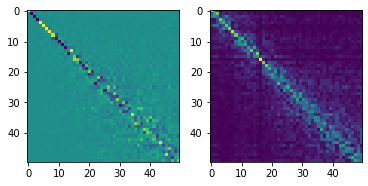

In [6]:
# compute ground-truth fmap and get complex fmap

kgt = 50
kgtQ = 50
C12_gt = np.linalg.pinv(Y.eig[Y.vts,:kgt]) @ X.eig[X.vts, :kgt]
Q12_gt = CMap2QMap_procrustes(X,Y,C12_gt,kgtQ)
T12_gt = fMap2pMap(Y.eig, X.eig, C12_gt.T)

plt.subplot(121)
plt.imshow(C12_gt)
plt.subplot(122)
plt.imshow(np.abs(Q12_gt))

In [19]:
# vfx is the (low-frequency) vector field on X
# it is transfered on Y as vfy using the complex functional map Q12_gt

kQ = 30
it = 10  # number of complex eigenvector
# vfx = X.ceig[:,it]  # here we choose the i-th eigenvector of the connection Laplacian
# one can also choose to transfer low spectral projections of any vector field
# such as a gradient for instance (here y-coordinate gradient)
vfx =  X.ceig[:,:kQ] @ np.linalg.pinv(X.ceig[:,:kQ]) @ X.grad_vert(X.v[:,1])

vfy = Y.ceig[:,:kQ] @ Q12_gt[:kQ,:kQ] @ np.linalg.pinv(X.ceig[:,:kQ]) @ vfx

q = mp.plot(X.v, X.f, np.abs(vfx), return_plot=True)
q.add_lines(X.v, X.v + 0.01 * X.embed_vector_field(vfx),
                shading={"line_color": "white"})


t = mp.plot(Y.v, Y.f, np.abs(vfy), return_plot=True)
t.add_lines(Y.v, Y.v + 0.01 * Y.embed_vector_field(vfy),
                shading={"line_color": "white"})

Renderer(camera=PerspectiveCamera(children=(DirectionalLight(color='white', intensity=0.6, position=(0.0061127…

Renderer(camera=PerspectiveCamera(children=(DirectionalLight(color='white', intensity=0.6, position=(-0.006295…

1